<a href="https://colab.research.google.com/github/swopnimghimire-123123/Machine-Learning-Journey/blob/main/38.2_Random_Sample_Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/38_train.csv", usecols=["Age","Fare","Survived"])

In [4]:
df.sample(3)

,Survived,Age,Fare
495,0,NaN,14.4583
9,1,14.0,30.0708
453,1,49.0,89.1042


In [5]:
df.isnull().mean()

,0
Survived,0.000000
Age,0.198653
Fare,0.000000


In [7]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [9]:
X_train.sample(3)

,Age,Fare
157,30.0,8.05
487,58.0,29.70
470,NaN,7.25


In [10]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [11]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [12]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

/tmp/ipython-input-3090101260.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
/tmp/ipython-input-3090101260.py

In [13]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([21.  , 40.5 ,  7.  ,  2.  , 36.  , 29.  , 43.  , 25.  , 62.  ,
       54.  , 45.  , 34.  , 32.  ,  4.  , 36.  , 47.  , 28.  , 34.  ,
       30.  , 24.  , 38.  , 24.  , 14.  , 30.  ,  3.  , 22.  , 27.  ,
       18.  , 48.  ,  8.  , 20.  , 24.  , 30.  ,  2.  , 25.  , 18.  ,
       36.  , 24.  , 39.  , 30.  , 19.  , 34.  , 25.  , 31.  , 37.  ,
       27.  , 24.  , 14.  , 21.  , 44.  , 32.  , 42.  ,  9.  , 24.  ,
       59.  , 20.  , 34.  , 17.  , 19.  , 32.  , 51.  , 57.  , 36.  ,
        0.67,  4.  , 23.  , 27.  , 20.  , 34.  , 17.  , 16.  , 64.  ,
       25.  , 31.  , 18.  , 50.  , 19.  , 24.  , 32.  , 24.  , 58.  ,
       22.  , 22.  , 23.  , 28.  , 42.  , 30.  , 44.  , 30.  ,  9.  ,
       33.  , 50.  , 39.  ,  4.  , 35.  , 30.  , 46.  , 25.  , 54.  ,
       29.  , 25.  , 26.  , 25.  , 18.  ,  8.  , 29.  ,  9.  ,  4.  ,
       39.  , 59.  , 28.  , 35.  , 19.  , 24.  , 17.  , 47.  , 18.  ,
       38.  , 19.  , 22.  , 27.  , 40.  , 56.  , 39.  , 26.  , 34.5 ,
       50.  , 70.  ,

In [14]:
X_train['Age'].isnull().sum()

np.int64(148)

In [15]:

X_train.sample(3)

,Age,Fare,Age_imputed
863,NaN,69.5500,62.0
295,NaN,27.7208,16.0
668,43.0,8.0500,43.0


/tmp/ipython-input-2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
/tmp/ipython-input-2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)


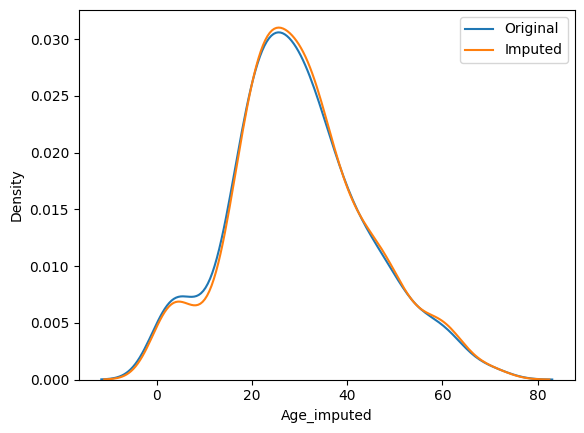

In [16]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [17]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  202.32584693322443


In [18]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,45.811304
Age,71.512440,204.349513,204.349513
Age_imputed,45.811304,204.349513,202.325847


<Axes: >

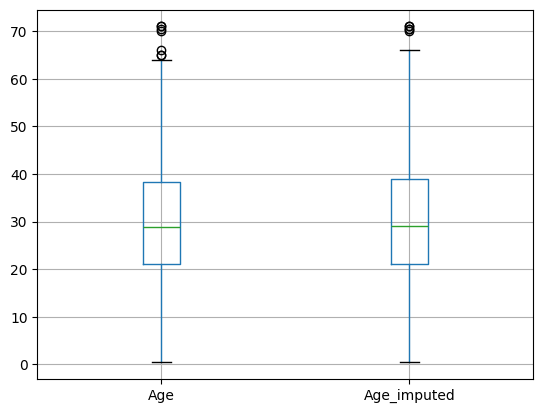

In [19]:
X_train[['Age', 'Age_imputed']].boxplot()

In [21]:
# Example of iterating through DataFrame rows
for index, observation in X_train.iterrows():
  # Now you can access 'Fare' for each observation
  fare_value = observation['Fare']
  print(f"Row {index}: Fare = {fare_value}")
  # You can now use fare_value in your logic

Row 30: Fare = 27.7208
Row 10: Fare = 16.7
Row 873: Fare = 9.0
Row 182: Fare = 31.3875
Row 876: Fare = 9.8458
Row 213: Fare = 13.0
Row 157: Fare = 8.05
Row 780: Fare = 7.2292
Row 572: Fare = 26.3875
Row 77: Fare = 8.05
Row 439: Fare = 10.5
Row 1: Fare = 71.2833
Row 175: Fare = 7.8542
Row 868: Fare = 9.5
Row 484: Fare = 91.0792
Row 248: Fare = 52.5542
Row 677: Fare = 9.8417
Row 4: Fare = 8.05
Row 397: Fare = 26.0
Row 116: Fare = 7.75
Row 645: Fare = 76.7292
Row 463: Fare = 13.0
Row 600: Fare = 27.0
Row 174: Fare = 30.6958
Row 582: Fare = 26.0
Row 334: Fare = 133.65
Row 71: Fare = 46.9
Row 202: Fare = 6.4958
Row 295: Fare = 27.7208
Row 818: Fare = 6.45
Row 119: Fare = 31.275
Row 177: Fare = 28.7125
Row 694: Fare = 26.55
Row 860: Fare = 14.1083
Row 374: Fare = 21.075
Row 13: Fare = 31.275
Row 809: Fare = 53.1
Row 792: Fare = 69.55
Row 330: Fare = 23.25
Row 273: Fare = 29.7
Row 699: Fare = 7.65
Row 877: Fare = 7.8958
Row 791: Fare = 26.0
Row 573: Fare = 7.75
Row 199: Fare = 13.0
Row 129: F

In [22]:
data = pd.read_csv('/content/38_house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [23]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [24]:
data.isnull().mean() * 100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [25]:

X = data
y = data['SalePrice']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [28]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
445,Gd,TA,127500,TA,Gd
830,Gd,TA,166000,TA,Gd
1076,TA,TA,170000,TA,TA
967,NaN,TA,135000,TA,NaN
542,TA,TA,213250,TA,TA


In [29]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

/tmp/ipython-input-856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
/tmp/

In [30]:

temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [31]:
temp

,original,imputed
TA,0.951043,0.952911
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [32]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.648709
TA,0.412439,0.536476
Fa,0.040917,0.056117
Po,0.027823,0.037037
Ex,0.024550,0.032548


/tmp/ipython-input-2695486330.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
/tmp/ipython-input-2695486330.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu']

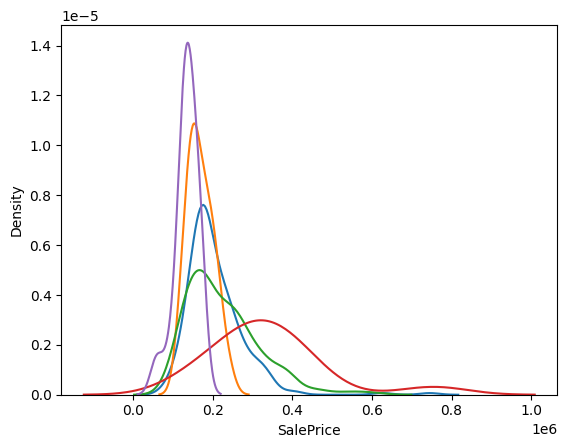

In [33]:

for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

/tmp/ipython-input-3530519742.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
/tmp/ipython-input-3530519742.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['Firep

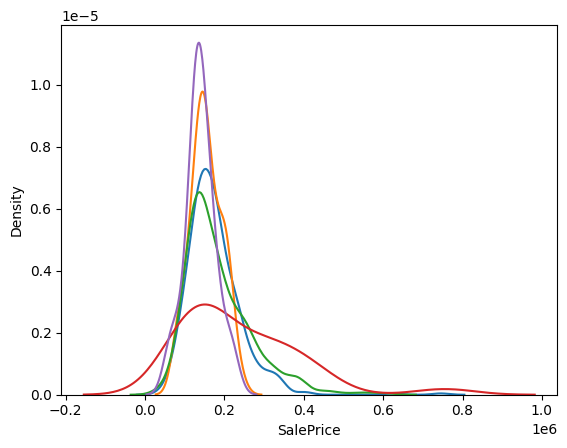

In [34]:

for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()